In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)



C:\Users\prana\AppData\Local\Temp\ipykernel_20444\3304705500.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


### Preprocessing Data

In [3]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411778,16.019377,15.381324,16.006995,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2757,2022-12-15,90.661102,93.474382,89.895656,92.987279,28298800
2758,2022-12-16,90.323097,91.207837,89.478122,90.661084,48485500


In [4]:
ma_100_days = data.Close.rolling(100).mean()


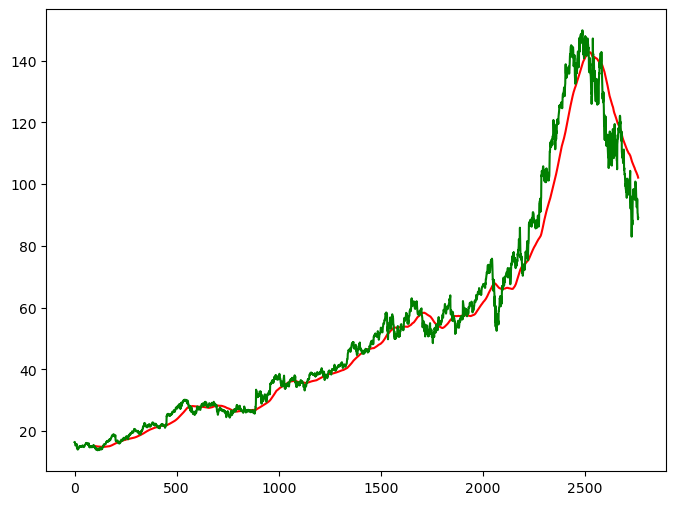

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [6]:
ma_200_days = data.Close.rolling(200).mean()


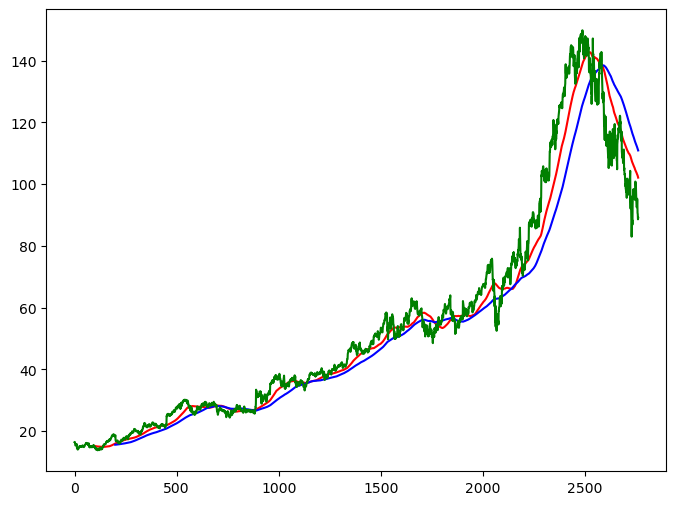

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
data.dropna(inplace = True)

In [9]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : int(len(data))])

data_train.shape,data_test.shape

((2208, 1), (553, 1))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [11]:
data_train_scale = scaler.fit_transform(data_train)
data_train_scale

array([[0.03654397],
       [0.03753005],
       [0.03434501],
       ...,
       [0.81515359],
       [0.83283887],
       [0.8530416 ]])

In [12]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i - 100 : i])
    y.append(data_train_scale[i, 0])

x, y = np.array(x), np.array(y)

x.shape

(2108, 100, 1)

### Model

In [13]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [14]:
model = Sequential()

model.add(LSTM(units = 50, activation= 'relu', return_sequences= True, input_shape= ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= "relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

d:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs= 50, verbose= 1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 290ms/step - loss: 0.0714
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - loss: 0.0094
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 272ms/step - loss: 0.0064
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0056
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0062
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0048
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.0044
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 339ms/step - loss: 0.0046
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 316ms/step - loss: 0.0042
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - loss: 0.0042
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 368ms/step - loss: 0.0042
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - loss: 0.0038
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 344ms/step - loss: 0.0036
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step - loss: 0.0031
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

### Prediction

In [17]:
data_test.shape

(553, 1)

In [18]:
past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [19]:
data_test = data_test[:-300]

In [20]:
data_test

Ticker,GOOG
0,69.920380
1,69.725540
2,70.104301
3,70.432343
4,70.473099
...,...
348,136.542374
349,138.363052
350,139.228409
351,138.027054


In [21]:
data_test_scale = scaler.fit_transform(data_test)
data_test_scale

array([[0.03007177],
       [0.02755404],
       [0.03244842],
       [0.03668739],
       [0.03721404],
       [0.03650116],
       [0.04433058],
       [0.0461932 ],
       [0.05094601],
       [0.04912204],
       [0.03357882],
       [0.05041304],
       [0.0556926 ],
       [0.06182643],
       [0.06805026],
       [0.02822207],
       [0.03422083],
       [0.03850514],
       [0.0531941 ],
       [0.0585893 ],
       [0.0488522 ],
       [0.04612892],
       [0.05906459],
       [0.06712521],
       [0.04628952],
       [0.05230139],
       [0.        ],
       [0.02252479],
       [0.03449707],
       [0.05018816],
       [0.06731154],
       [0.08722238],
       [0.08046559],
       [0.08741512],
       [0.09704298],
       [0.11679323],
       [0.09726767],
       [0.10320244],
       [0.098745  ],
       [0.10154528],
       [0.09997163],
       [0.13219526],
       [0.12750634],
       [0.13397438],
       [0.10005523],
       [0.09760819],
       [0.10938122],
       [0.090

In [22]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)

In [23]:
y_predict = model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step


Find the scale value used to divide the closing price to fit between 0 & 1 in min-max scaling so that we can convert back the predicted values to real life closing price.

In [24]:
scale = 1/scaler.scale_ 
scale

array([77.38699341])

In [25]:
y_predict = y_predict * scale
y = y * scale



<function matplotlib.pyplot.show(close=None, block=None)>

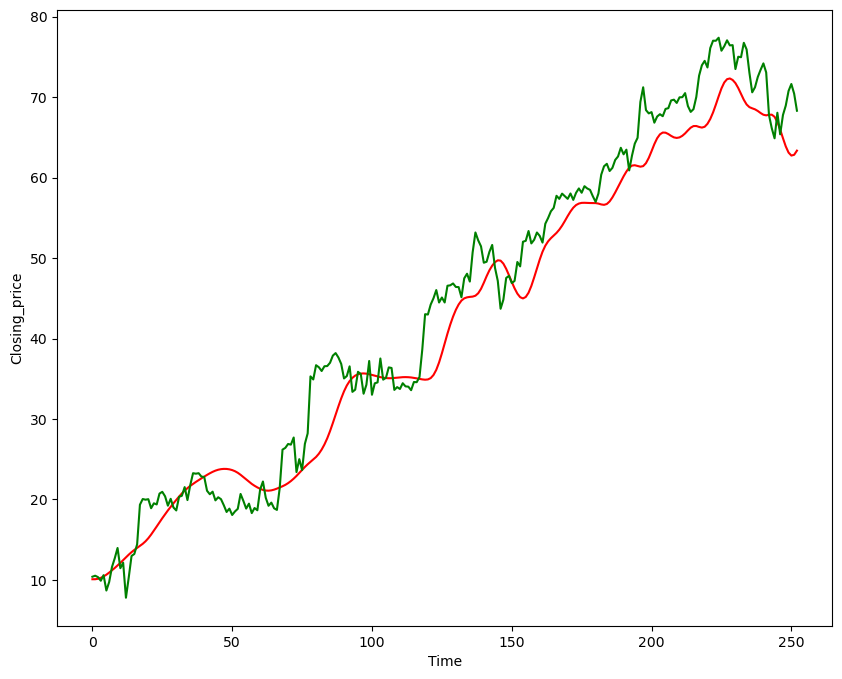

In [26]:
plt.figure(figsize= (10, 8))
plt.plot(y_predict, 'r', label="Predicted_values")
plt.plot(y, 'g', label="Original_price")

plt.xlabel("Time")
plt.ylabel("Closing_price")

plt.show

In [27]:
model.save('Stock Analysis Model.keras')